# Topological Data Analysis
### Soham Changani

This notebook will provide an introduction to Topological Data Analysis(TDA), show how we can interpret persistence plots, show simulations of data that could be analyzed with TDA, and finally work with an example of real data and apply TDA to the analysis. The target audience for this notebook knows about Homology, topological invariants and have had some introduction to time series data. If you would like to learn more about the concepts mentioned, there is a supplemental paper that will walk you through these concepts. Any other questions can be emailed to changa_s1@denison.edu.

In [19]:
#Importing required packages
import pandas as pd
import os
import matplotlib as plt
import numpy as np
import sklearn
import plotly.graph_objects as go
from gtda.time_series import SingleTakensEmbedding
from gtda.plotting import plot_point_cloud
from gtda.homology import VietorisRipsPersistence
from sklearn.decomposition import PCA
#from data.generate_datasets import make_gravitational_waves
from pathlib import Path
from ripser import ripser
from persim import plot_diagrams
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from persim import plot_diagrams
import time
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

Firstly we will just see some plots, their persistence diagrams and how to interpret them.

The 3 following code chunks are adapted from https://github.com/ctralie/TDALabs. I am using it to show persistence diagrams of topological shapes and how to interpret them.

<IPython.core.display.Javascript object>


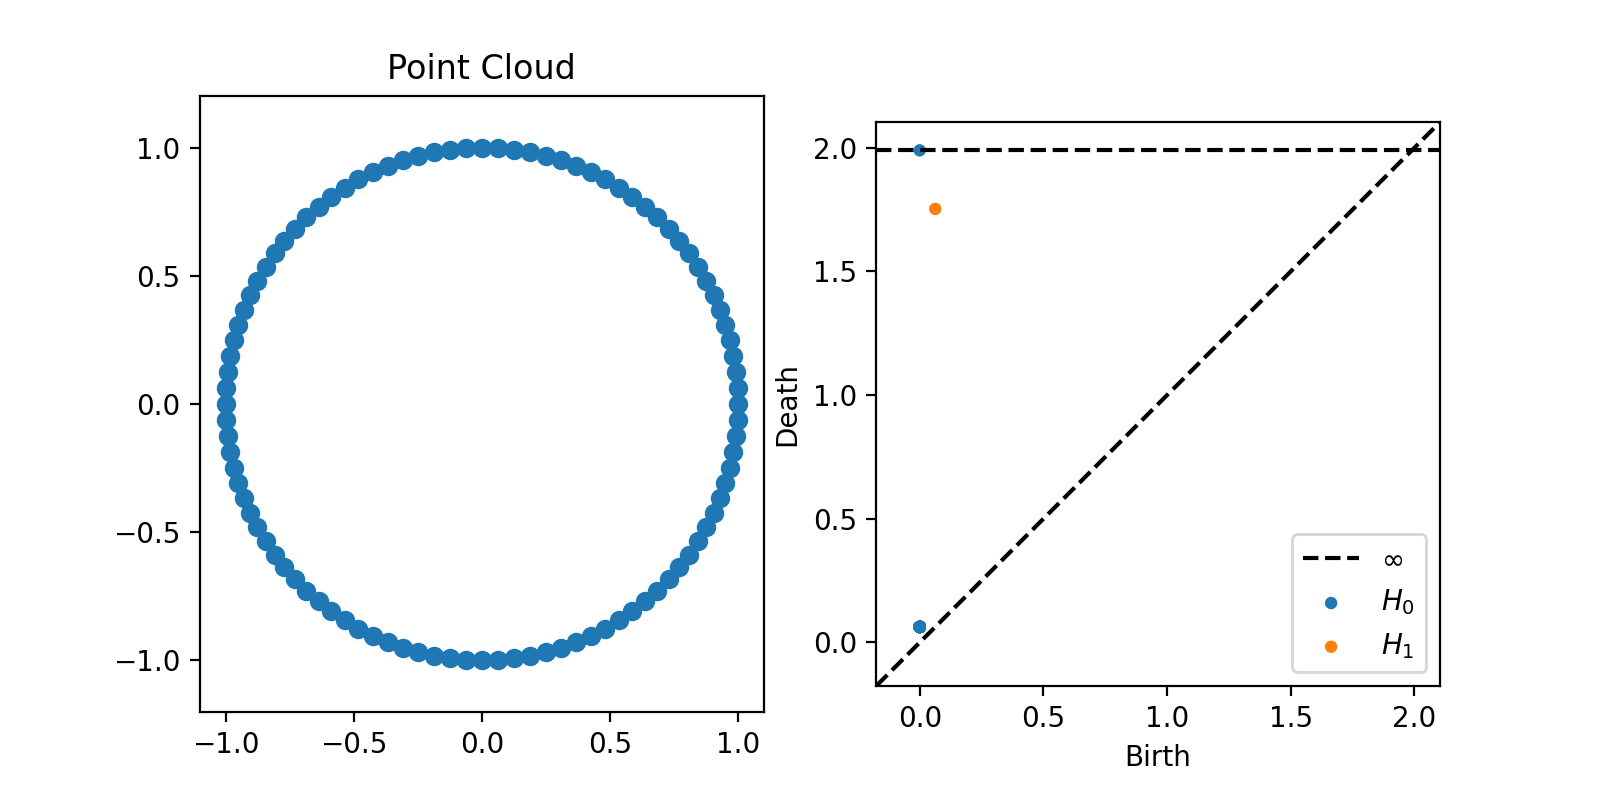

In [20]:
#Circle
N = 100
t = np.linspace(0, 2*np.pi, N+1)[0:N]
X = np.zeros((N, 2))
X[:, 0] = np.cos(t)
X[:, 1] = np.sin(t)

# Compute the persistence diagram of this point cloud
dgms = ripser(X)['dgms']

plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.title("Point Cloud")
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

In [21]:
#plt.close() #We need to close each of the plots we make or we might error when creating new plots.

The theory behind creating persistence diagrams is as follows:
We create a circle blob or disk around each point in our data set. At the start, i.e. at radius close to 0, each point is a connected component. We then allow the radius of the disk to grow. We record the radius at which each connected component is "born" and "dies". When two disks intersect, one of the connected components is said to die since they are now both one component. This relates to $H_0$ on the persistence plots. Additionally, we also measure the birth and death radii for every loop or circle that appears in our data. This is measured by the $H_1$ point on the persistence diagram. Finally, we also capture the birth and death of $H_2$ components which are in the form of voids (like a sphere). This example has no $H_2$ points since there are no voids appearing in our data. We will see examples of it later.

This is theoretical data that looks like a circle. Notice the persistence diagram on the right. The way we read this persistence diagram is by looking at the distance of a point from the $x=y$ line. We get one distinct orange point far from the line. This suggests that there is a circular shape in the data. All the blue points die very quickly except for one. This suggests that most of the data is very close together and hence gets connected quickly.

*Why Persistent Homology?*

We might wonder why we don't just compute the homology group of the point cloud of a given data structure and why we care about the birth and death of topological features. The answer is actually quite simple. The homology group of most sets of points (take the circle above for example) is actually just $0$. This is because there is no inherent connected component structure in any point cloud. However, if we use the method described i.e. increasing the size of blobs around a point and noticing which of the topological structures *persist*, this gives us a better idea about the structure of the data since we can observe whether there are any voids or loops in the dataset.

<IPython.core.display.Javascript object>


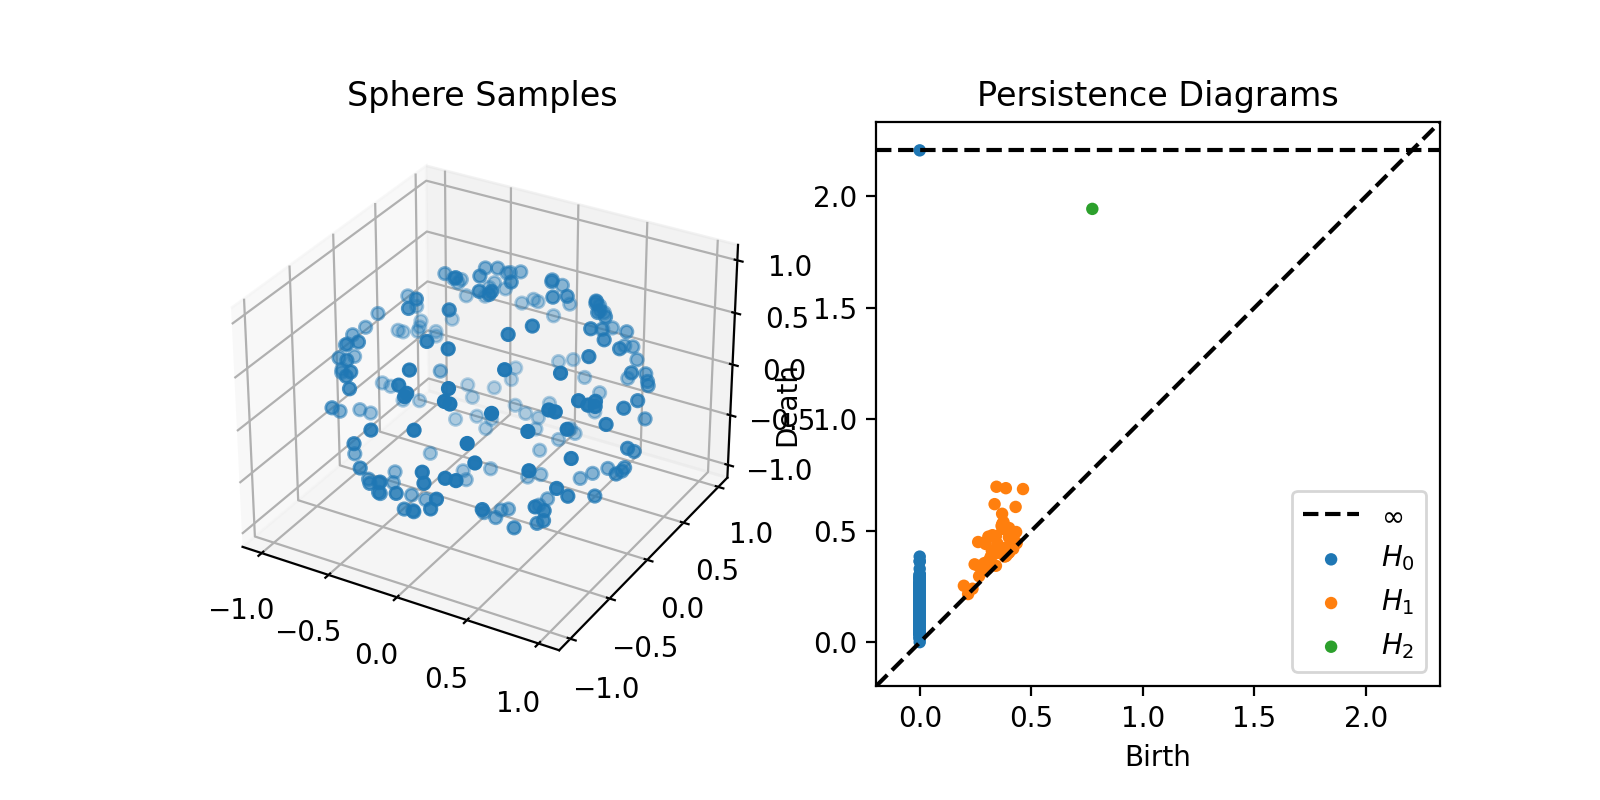

Text(0.5, 1.0, 'Persistence Diagrams')

In [22]:
#Sphere
N = 200 #Number of points
X = np.random.randn(N, 3)
X = X/np.sqrt(np.sum(X**2, 1))[:, None] 

dotProds = X.dot(X.T) 
dotProds[dotProds < -1] = -1
dotProds[dotProds > 1] = 1
DSphere = np.arccos(dotProds) 
np.fill_diagonal(DSphere, 0)

dgms = ripser(DSphere, distance_matrix=True, maxdim=2)['dgms']
fig = plt.figure(figsize=(8, 4))
ax = plt.subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.title("Sphere Samples")
plt.subplot(122)
plot_diagrams(dgms)
plt.title("Persistence Diagrams")

In [26]:
#plt.close()

The above diagram is simulated sphere. Notice the prominent appearance of an $H_2$ dot i.e. a void. This void appears since the data is spherical in nature. Notice again how the connected components all die very soon. This suggests that the points are close together which would make sense since the radius of our sphere is $1$.

<IPython.core.display.Javascript object>


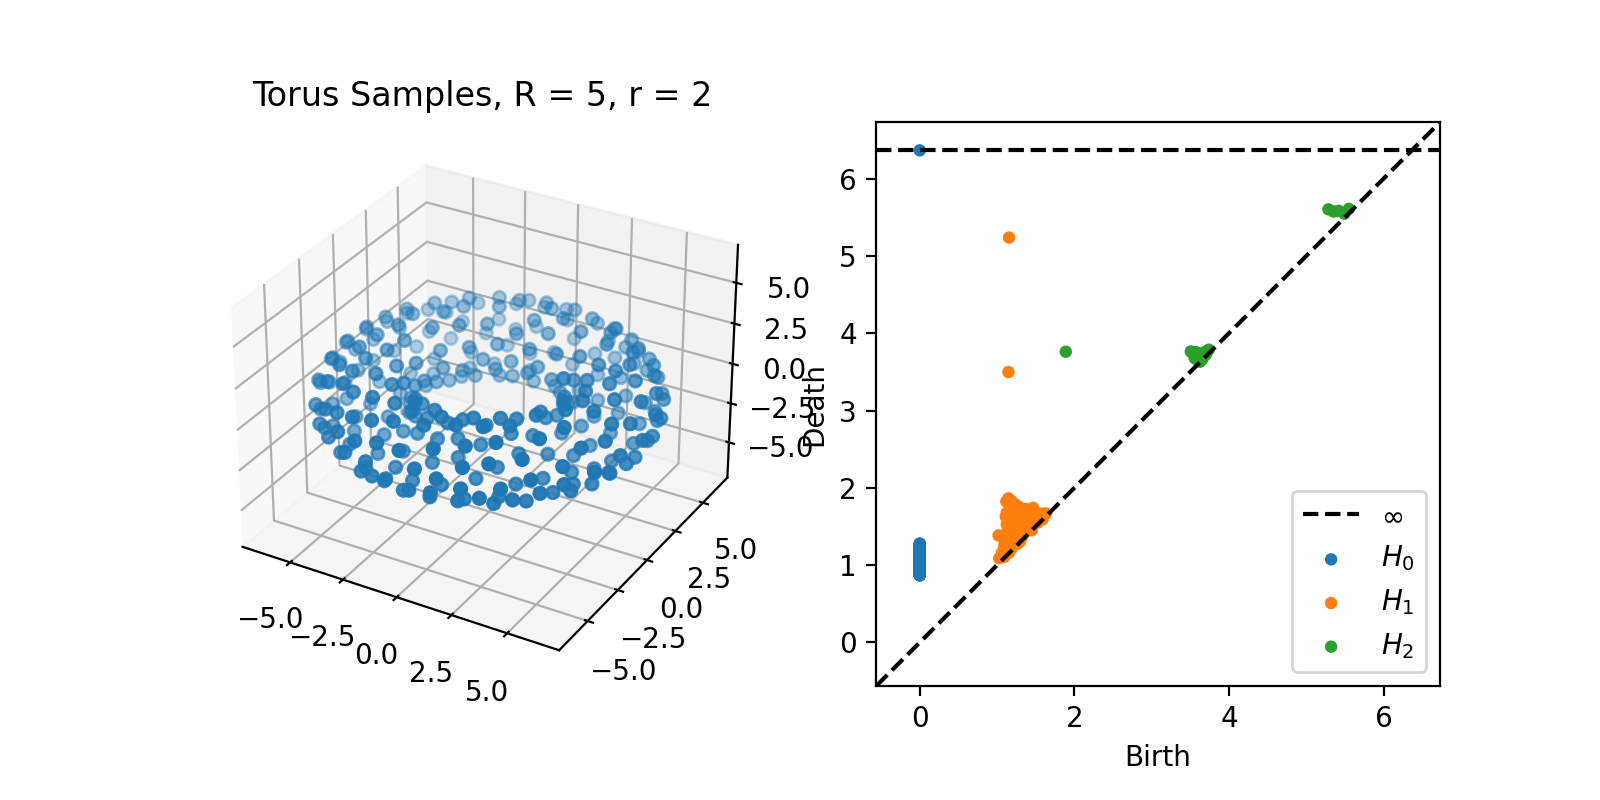

In [40]:
#Torus
N = 10000
n_perm = 300
R = 5
r = 2
theta = np.random.rand(N)*2*np.pi
phi = np.random.rand(N)*2*np.pi
X = np.zeros((N, 3))
X[:, 0] = (R + r*np.cos(theta))*np.cos(phi)
X[:, 1] = (R + r*np.cos(theta))*np.sin(phi)
X[:, 2] = r*np.sin(theta)
xr = [np.min(X.flatten()), np.max(X.flatten())]

res = ripser(X, maxdim=2, n_perm=n_perm)
dgms = res['dgms']
X = X[res['idx_perm'], :] 

plt.figure(figsize=(8, 4))
ax = plt.subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(xr)
ax.set_ylim(xr)
ax.set_zlim(xr)
plt.title("Torus Samples, R = %g, r = %g"%(R, r))
plt.subplot(122)
plot_diagrams(dgms)
plt.show()

Notice the persistence diagram of a torus. Note that there are two persistent circles or loops that appear (recall that a torus can be thought of as $S^1 \times S^1$. Additionally, there is a persistent void, as is visible in the point cloud since this is a "hollow torus".

Now that we have seen some basic shapes and their persistence diagrams, let's look at another example of a simulated data set and the corresponding persistence plot.

In [28]:
#plt.close()

The following code chunk is adapted from https://github.com/trneedham/DistrictingAndTDA/tree/master/Notebooks. This is an example of a data set that would be suited to TDA rather than other clustering or regression algorithms.

In [29]:
X1, y1 = make_circles(n_samples=500, noise = 0.05, factor=0.3, random_state = 3)
X2, y2 = make_blobs(n_samples=500, centers=2, center_box = (-10,10), random_state=2)

X = np.concatenate((3*X1-np.array([[12,0]]),X2),axis=0)

plt.scatter(X[:,0],X[:,1]);

In [30]:
#plt.close()

In [31]:
diagrams = ripser(X)['dgms']
plot_diagrams(diagrams)

We can now read this persistence diagram and try to understand what points would correspond to what structures. The inner and outer circles on the top left are born soon and then die after some time(hence the two orange dots distinctly above the x-y line). The two groups of points on the right become single connected components that are born soon but die after a while since they are detached from the other data points. This explains the $H_0$ points that are farther from the x-y line.

In [32]:
plt.close()

### TDA in Time Series Analysis
Having learned how to make and interpret persistence plots, we will now work with time series data and understand how to analyze time series data using TDA. The general structure for topological time series analysis is:

1) Take a time series object.

2) Make a sliding window point cloud.

3) Make a Vietoris-Rips complex.

4) Plot the persistence diagram to find the connected components, loops and voids in the embedding.

Firstly, we will use some simulated examples of time series and see how the persistence plots look. The following chunks of code have been adapted from https://giotto-ai.github.io/gtda-docs/0.3.0/notebooks/time_series_classification.html.

*Sliding Window point cloud*

The first step in analyzing time series data using TDA is to create a sliding window point cloud. This is not the only method but it is widely used. This is done by constructing a time delay embedding or a Takens embedding, named after Floris Takens. A time delay embedding is created by sliding a window of some size $d$ over the signal to represent each window as a point in a possibly higher dimensional space. Hence, let $d$ be our window size and let $\tau$ be the step. For a time series $f(t)$, in order to create a particular window, we take points $[f(t), f(t+\tau), \dots, f(t+d\tau)] \in \mathbb{R}^{d+1}$. Thus, each window gives us a point in $\mathbb{R}^{d+1}$ for a specified $d$. This then gives us a point cloud which we can create a Vietoris-Rips complex (essentially we are creating a simplicial complex of our point cloud) before creating and interpreting the persistence diagram.

In [33]:
#Firstly, consider a simulation of a periodic time series.
x_periodic = np.linspace(0, 10, 1000)
y_periodic = np.cos(5 * x_periodic)

fig = go.Figure(data=go.Scatter(x=x_periodic, y=y_periodic))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [34]:
from gtda.time_series import SingleTakensEmbedding

embedding_dimension_periodic = 3
embedding_time_delay_periodic = 8
stride = 10

embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

In [35]:
y_periodic_embedded = embedder_periodic.fit_transform(y_periodic)
from gtda.plotting import plot_point_cloud
plot_point_cloud(y_periodic_embedded)

This diagram shows what the Takens embedding looks like when using a sliding window for the given periodic time series. Notice how it has a circular shape in 3D. This gives us the persistence diagram below with a persistent $H_1$ dot and the connected components ($H_0$) quickly dying.

In [36]:
from gtda.homology import VietorisRipsPersistence

y_periodic_embedded = y_periodic_embedded[None, :, :]
homology_dimensions = [0, 1, 2]

periodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6)

print("Persistence diagram for periodic signal")
periodic_persistence.fit_transform_plot(y_periodic_embedded)

Persistence diagram for periodic signal


array([[[0.        , 0.02968527, 0.        ],
        [0.        , 0.02979543, 0.        ],
        [0.        , 0.03002368, 0.        ],
        [0.        , 0.03050811, 0.        ],
        [0.        , 0.0310097 , 0.        ],
        [0.        , 0.03119781, 0.        ],
        [0.        , 0.03184138, 0.        ],
        [0.        , 0.03283644, 0.        ],
        [0.        , 0.03369502, 0.        ],
        [0.        , 0.0344742 , 0.        ],
        [0.        , 0.03494403, 0.        ],
        [0.        , 0.03597357, 0.        ],
        [0.        , 0.03632426, 0.        ],
        [0.        , 0.03743265, 0.        ],
        [0.        , 0.03896736, 0.        ],
        [0.        , 0.04018315, 0.        ],
        [0.        , 0.04183634, 0.        ],
        [0.        , 0.04312626, 0.        ],
        [0.        , 0.04355394, 0.        ],
        [0.        , 0.04487357, 0.        ],
        [0.        , 0.04663508, 0.        ],
        [0.        , 0.04798774, 0

In [37]:
#Simulated non-periodic time series
x_nonperiodic = np.linspace(0, 50, 1000)
y_nonperiodic = np.cos(x_nonperiodic) + np.cos(np.pi * x_nonperiodic)

fig = go.Figure(data=go.Scatter(x=x_nonperiodic, y=y_nonperiodic))
fig.update_layout(xaxis_title="Timestamp", yaxis_title="Amplitude")
fig.show()

In [38]:
embedding_dimension_nonperiodic = 3
embedding_time_delay_nonperiodic = 16
stride = 3

embedder_nonperiodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_nonperiodic,
    dimension=embedding_dimension_nonperiodic,
    stride=stride,
)

y_nonperiodic_embedded = embedder_nonperiodic.fit_transform(y_nonperiodic)

plot_point_cloud(y_nonperiodic_embedded)

In [39]:
y_nonperiodic_embedded = y_nonperiodic_embedded[None, :, :]

nonperiodic_persistence = VietorisRipsPersistence(
    homology_dimensions=homology_dimensions, n_jobs=6
)
print("Persistence diagram for nonperiodic signal")
nonperiodic_persistence.fit_transform_plot(y_nonperiodic_embedded)

Persistence diagram for nonperiodic signal


array([[[0.        , 0.00669674, 0.        ],
        [0.        , 0.00935366, 0.        ],
        [0.        , 0.01807661, 0.        ],
        ...,
        [0.25856125, 0.26006246, 1.        ],
        [0.77751291, 1.70462596, 2.        ],
        [0.77221543, 1.73804259, 2.        ]]])

Notice the differences between the two persistence diagrams. The first embedding is clearly circular or like a loop, corresponding to the persistent $H_1$. On the other hand, the persistence diagram of the nonperiodic signal shows persistent voids in the embedding but no significant loops.

It is important to mention at this point that persistent homology provides us with a way to differentiate between two signals. If two time series are different, they cannot have the same persistence diagrams i.e. it is an *invariant*. As a result, TDA is also useful in clustering time series i.e. categorizing if two time series plots are similar and if so how similar. This is done in the supplementary R-markdown file with this project.

The objective of this file is mostly to introduce TDA and show how it can be used to classify data, time series and otherwise. It is supplemented by the R code and the paper that have more analysis and real life examples. Note how we specify the time delay embedding and the embedding dimension in our code. There is a method under the package gtda that allows us to search for the optimum window size and embedding dimension using Principal Component Analysis. The code for that can be found on this link https://giotto-ai.github.io/gtda-docs/0.3.0/notebooks/time_series_classification.html.